In [ ]:
import pandas as pd
df=pd.read_csv("/content/merged_data1.csv")

In [ ]:
df

,Customer_ID,verbatims,call_center,issue_level1,issue_level2,call_category_1,call_category_2,resolution,upsell_xsell,churn,...,MB_Data_Usg_M05,MB_Data_Usg_M06,MB_Data_Usg_M07,MB_Data_Usg_M08,MB_Data_Usg_M09,seconds_of_data_norm,seconds_of_data_log,verbatims1,sentiment_category,sentiment_score
0,471,Customer service is no longer an option with y...,Bothell - IRU,Bill and Payments,Equipment Upgrade Fee,Process & Efficiency,NaN,Educated - Equipment upgrade fee,0,0,...,0.0,0.0,0.0,0.0,0.0,60.0,4.110874,0.0,Neutral,0.000000
1,1057,My phone was stollen 5 days ago I got the new...,Davenport Call Center,Equipment,Equipment Change: Change IMEI/SIM,Product Range & Availability,Upgrades/Renewals,Resolved: Updated IMEI,0,0,...,0.0,0.0,0.0,330.0,646.0,48300.0,10.785208,0.0,Positive,0.068182
2,1177,MTT needs to lower their plans Im consideri...,Miramar - IRU,Bill and Payments,Process a Payment,Cost of Service,Tech Support,Processed 1 time payment and PCF waived,0,0,...,0.0,0.0,0.0,0.0,0.0,14700.0,9.595671,0.0,Negative,-0.166667
3,1181,Phones were turned off due to past due bill S...,Convergys1 Receivables Management,Account,Reinstate Account,Friendly & Courteous,Process & Efficiency,Unable to Restore/Unsuspend,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.5,Negative,-0.035455
4,1185,It was great,Miramar - IRU,Bill and Payments,Payment Arrangements,Friendly & Courteous,NaN,Made payment arrangements,0,1,...,0.0,0.0,0.0,0.0,0.0,15840.0,9.670357,0.0,Positive,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,75360,Wanted to know why it sometimes takes hours to...,Santo Domingo - IRU,Technical or Troubleshooting,Cannot Receive Text Messages,Product Range & Availability,Competitor,Cancelled Registration,0,0,...,0.0,0.0,0.0,0.0,0.0,21480.0,9.974924,0.0,Positive,0.475000
1271,75364,Happy so far with customer service,Moravia - IRU,Bill,Credit Adjustment,Process & Efficiency,NaN,Completed,0,0,...,0.0,0.0,0.0,0.0,0.0,264.0,5.579730,0.0,Positive,0.450000
1272,75365,1,Dallas Call Center,Payments,Payment Arrangements,Helpfulness,NaN,Set up Payment Arrangement and Scheduled Payment,0,0,...,0.0,0.0,0.0,0.0,0.0,17880.0,9.791494,0.0,Neutral,0.000000
1273,75371,Shakeel and Luis were awesome Great personali...,Boise Call Center,Equipment,3rd Party Charges,Process & Efficiency,NaN,Resolved: Applied refund/ blocked purchases,0,0,...,0.0,0.0,0.0,0.0,0.0,6300.0,8.748464,0.0,Positive,0.900000


In [ ]:
col_names=df.columns

In [ ]:
for x in col_names:
  print(x)

Customer_ID
verbatims
call_center
issue_level1
issue_level2
call_category_1
call_category_2
resolution
upsell_xsell
churn
lifetime_value
avg_arpu_3m
acct_age
billing_cycle
nbr_contracts_ltd
credit_class
sales_channel
rfm_score
Est_HH_Income
zipcode_primary
cs_med_home_value
cs_pct_home_owner
cs_ttl_pop
cs_hispanic
cs_caucasian
cs_afr_amer
cs_other
cs_ttl_urban
cs_ttl_rural
cs_ttl_male
cs_ttl_female
cs_ttl_hhlds
cs_ttl_mdage
forecast_region
product_plan_desc
mb_inclplan
ever_days_over_plan
ever_times_over_plan
handset_age_grp
handset
lifestage
rp_pooled_ind
data_device_age
equip_age
mfg_apple
mfg_samsung
mfg_htc
mfg_motorola
mfg_lg
mfg_nokia
delinq_indicator
times_delinq
count_of_suspensions_6m
avg_days_susp
calls_total
calls_in_pk
calls_in_offpk
calls_out_offpk
calls_out_pk
mou_total_pct_MOM
mou_onnet_pct_MOM
mou_roam_pct_MOM
mou_onnet_6m_normal
mou_roam_6m_normal
voice_tot_bill_mou_curr
tot_voice_chrgs_curr
tot_drpd_pr1
bill_data_usg_m03
bill_data_usg_m06
bill_data_usg_m09
mb_data_usg

In [ ]:
o = df.select_dtypes(include=['object'])
o.dtypes

verbatims             object
call_center           object
issue_level1          object
issue_level2          object
call_category_1       object
call_category_2       object
resolution            object
sentiment_category    object
dtype: object

In [ ]:
columns_to_drop = ["call_center", "issue_level1", "issue_level2", "call_category_1", "call_category_2", "resolution", "verbatims"]
df = df.drop(columns=columns_to_drop)

In [ ]:
o = df.select_dtypes(include=['object'])
o.dtypes

sentiment_category    object
dtype: object

In [ ]:
df["sentiment_category"].unique()

array(['Neutral', 'Positive', 'Negative', nan], dtype=object)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['sentiment_category']= label_encoder.fit_transform(df['sentiment_category'])
df['sentiment_category'].unique()

array([1, 2, 0, 3])

In [ ]:
corr_matrix = df.corr()

correlated_columns = {}


for col in corr_matrix.columns:
    correlated_columns[col] = []

    for other_col in corr_matrix.columns:
        if col != other_col:
            if corr_matrix.loc[col, other_col] >= 0.5 or corr_matrix.loc[col, other_col] <= -0.5:
                correlated_columns[col].append(other_col)

for k, v in correlated_columns.items():
    if v:  # Check if the list of correlated columns is not empty
        print(f"Column: {k}")
        print("Correlated Columns:", v)

Column: upsell_xsell
Correlated Columns: ['calls_care_acct', 'price_mention']
Column: lifetime_value
Correlated Columns: ['rfm_score', 'calls_total', 'calls_in_pk', 'calls_in_offpk', 'calls_out_offpk', 'calls_out_pk', 'voice_tot_bill_mou_curr', 'bill_data_usg_m03', 'bill_data_usg_m06', 'mb_data_usg_m01', 'mb_data_usg_m02', 'mb_data_usg_m03', 'seconds_of_data_norm']
Column: avg_arpu_3m
Correlated Columns: ['tot_voice_chrgs_curr']
Column: nbr_contracts_ltd
Correlated Columns: ['data_device_age']
Column: rfm_score
Correlated Columns: ['lifetime_value', 'calls_total', 'calls_in_pk', 'calls_in_offpk', 'calls_out_offpk', 'calls_out_pk', 'voice_tot_bill_mou_curr', 'bill_data_usg_m03', 'bill_data_usg_m06', 'mb_data_usg_m01', 'mb_data_usg_m02', 'mb_data_usg_m03', 'seconds_of_data_norm', 'seconds_of_data_log']
Column: zipcode_primary
Correlated Columns: ['forecast_region']
Column: cs_ttl_pop
Correlated Columns: ['cs_ttl_urban', 'cs_ttl_rural', 'cs_ttl_hhlds']
Column: cs_hispanic
Correlated Colum

In [ ]:
df['upsell_xsell'].unique()

array([0, 1])

In [ ]:

df['calls_care_acct'].unique()

array([ 1.,  0.,  2.,  3.,  4., nan])

In [ ]:
null_values = df.isnull().any()

columns_with_null = null_values[null_values].index
print("Columns with null values:", columns_with_null)

Columns with null values: Index(['avg_arpu_3m', 'cs_med_home_value', 'cs_pct_home_owner', 'cs_ttl_pop',
       'cs_hispanic', 'cs_caucasian', 'cs_afr_amer', 'cs_other',
       'cs_ttl_urban', 'cs_ttl_rural', 'cs_ttl_male', 'cs_ttl_female',
       'cs_ttl_hhlds', 'cs_ttl_mdage', 'data_device_age', 'mou_roam_6m_normal',
       'voice_tot_bill_mou_curr', 'tot_voice_chrgs_curr', 'tot_drpd_pr1',
       'bill_data_usg_m03', 'bill_data_usg_m06', 'bill_data_usg_m09',
       'mb_data_usg_m01', 'mb_data_usg_m02', 'mb_data_usg_m03',
       'mb_data_ndist_mo6m', 'mb_data_usg_roamm01', 'mb_data_usg_roamm02',
       'mb_data_usg_roamm03', 'data_usage_amt', 'tweedie_adjusted',
       'tot_mb_data_curr', 'tot_mb_data_roam_curr', 'bill_data_usg_tot',
       'tot_overage_chgs', 'data_prem_chrgs_curr', 'nbr_data_cdrs',
       'avg_data_chrgs_3m', 'avg_data_prem_chrgs_3m', 'avg_overage_chrgs_3m',
       'nbr_contacts', 'calls_TS_acct', 'open_tsupcomplnts',
       'num_tsupcomplnts', 'unsolv_tsupcomplnt', 

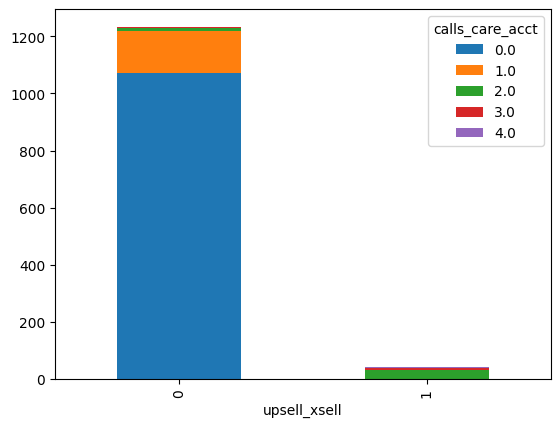

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

pd.crosstab(df['upsell_xsell'], df['calls_care_acct']).plot(kind='bar', stacked=True)
plt.show()

In [ ]:
df['price_mention'].unique()

array([ 0.,  1.,  2., nan])

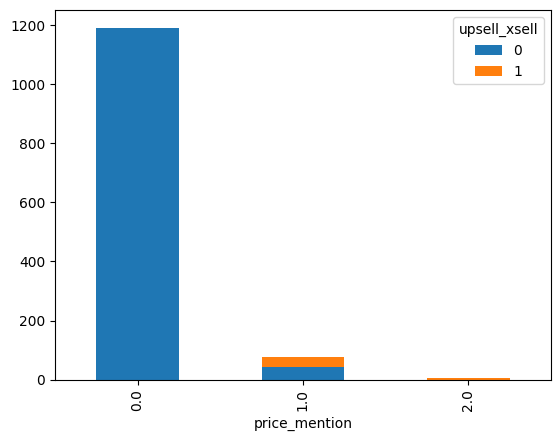

In [ ]:
pd.crosstab(df['price_mention'], df['upsell_xsell']).plot(kind='bar', stacked=True)
plt.show()


lifetime_value

In [ ]:
df['rfm_score'].unique()

array([223, 333, 312, 112, 332, 213, 323, 322, 233, 123, 222, 232, 313,
       122, 121, 111, 212, 231, 133, 131, 321, 331, 113, 221, 311, 132,
       211])

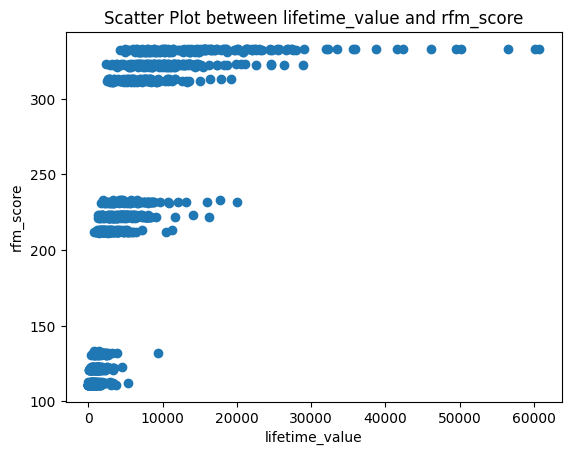

In [ ]:
plt.scatter(df['lifetime_value'], df['rfm_score'])
plt.xlabel('lifetime_value')
plt.ylabel('rfm_score')
plt.title('Scatter Plot between lifetime_value and rfm_score')
plt.show()

More the rfm-score more tthe lifetime-value

cs_ttl_pop-population
cs_ttl_hhlds-housholds

In [ ]:
df['cs_ttl_pop'].unique()

array([14252., 31717., 22195., ..., 22869., 33736.,  5034.])

In [ ]:
df['cs_ttl_hhlds'].unique()

array([ 5770., 12166.,  9060., ..., 11737., 11601.,  1599.])

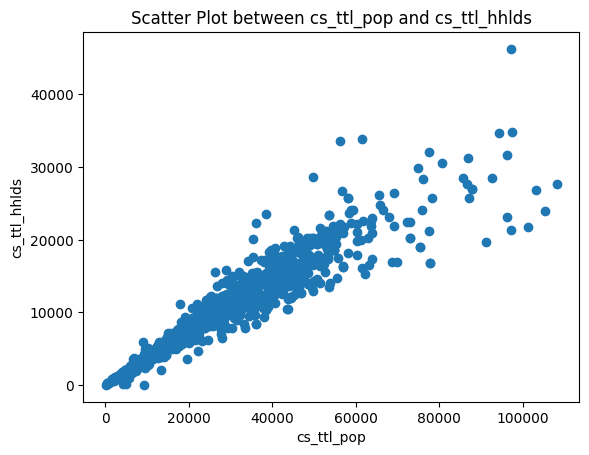

In [ ]:
plt.scatter(df['cs_ttl_pop'], df['cs_ttl_hhlds'])
plt.xlabel('cs_ttl_pop')
plt.ylabel('cs_ttl_hhlds')
plt.title('Scatter Plot between cs_ttl_pop and cs_ttl_hhlds')
plt.show()

cs_ttl_urban-
cs_ttl_rural

In [ ]:
df['cs_ttl_urban'].unique()

array([100.  ,  99.67,  69.96,  85.64,  92.26,  38.82,  99.99,  67.18,
        93.47,  78.06,  98.1 ,  87.64,  99.43,  94.24,  76.57,   0.  ,
        59.59,  99.84,  80.94,  88.07,  99.88,  73.08,  98.27,  70.99,
        93.32,  91.54,  74.89,  53.4 ,  82.5 ,  35.47,  68.88,  70.  ,
        33.28,  92.28,  66.19,  64.13,  77.88,  99.94,  76.48,  79.06,
        55.34,  99.02,  87.54,  59.05,  64.52,  95.86,  58.65,    nan,
        59.34,  98.36,  73.71,  64.9 ,  96.54,  27.75,  75.53,  78.18,
        32.62,  85.21,  98.57,  98.4 ,  99.34,  80.15,  93.38,  82.48,
        35.1 ,   1.23,  60.78,  75.95,  99.4 ,  55.5 ,  41.84,  71.21,
        55.63,  99.91,  58.28,  95.34,  96.36,  63.03,  96.14,  97.73,
        53.19,  85.59,  86.53,  60.59,  94.08,  95.52,  98.05,  91.5 ,
        63.09,  76.14,  69.41,  94.59,  81.67,  79.28,  99.96,  69.98,
        90.19,  86.96,  53.39,  27.81,  99.16,  94.83,  81.52,  38.43,
        99.1 ,  86.17,  38.29,  95.07,  44.72,  99.33,  85.57,  72.51,
      

In [ ]:
df['cs_ttl_urban'].isnull().any()

True

In [ ]:
mean_cs_ttl_urban = df['cs_ttl_urban'].mean()

df['cs_ttl_urban'] = df['cs_ttl_urban'].fillna(mean_cs_ttl_urban)
df['cs_ttl_urban'].isnull().any()

False

In [ ]:
df['cs_ttl_rural'].unique()

array([0.000e+00, 3.300e-01, 3.004e+01, 1.436e+01, 7.740e+00, 6.118e+01,
       1.000e-02, 3.282e+01, 6.530e+00, 2.194e+01, 1.900e+00, 1.236e+01,
       5.700e-01, 5.760e+00, 2.343e+01, 1.000e+02, 4.041e+01, 1.600e-01,
       1.906e+01, 1.193e+01, 1.200e-01, 2.692e+01, 1.730e+00, 2.901e+01,
       6.680e+00, 8.460e+00, 2.511e+01, 4.660e+01, 1.750e+01, 6.453e+01,
       3.112e+01, 3.000e+01, 6.672e+01, 7.720e+00, 3.381e+01, 3.587e+01,
       2.212e+01, 6.000e-02, 2.352e+01, 2.094e+01, 4.466e+01, 9.800e-01,
       1.246e+01, 4.095e+01, 3.548e+01, 4.140e+00, 4.135e+01,       nan,
       4.066e+01, 1.640e+00, 2.629e+01, 3.510e+01, 3.460e+00, 7.225e+01,
       2.447e+01, 2.182e+01, 6.738e+01, 1.479e+01, 1.430e+00, 1.600e+00,
       6.600e-01, 1.985e+01, 6.620e+00, 1.752e+01, 6.490e+01, 9.877e+01,
       3.922e+01, 2.405e+01, 6.000e-01, 4.450e+01, 5.816e+01, 2.879e+01,
       4.437e+01, 9.000e-02, 4.172e+01, 4.660e+00, 3.640e+00, 3.697e+01,
       3.860e+00, 2.270e+00, 4.681e+01, 1.441e+01, 

In [ ]:
mean_cs_ttl_rural = df['cs_ttl_rural'].mean()

df['cs_ttl_rural'] = df['cs_ttl_rural'].fillna(mean_cs_ttl_rural)
df['cs_ttl_rural'].isnull().any()

False

there is a

In [ ]:
import numpy as np
df['location'] = np.where(df['cs_ttl_urban'] > 50, 0, 1)
df['location'] = df['location'].replace({0: 'urban', 1: 'rural'})

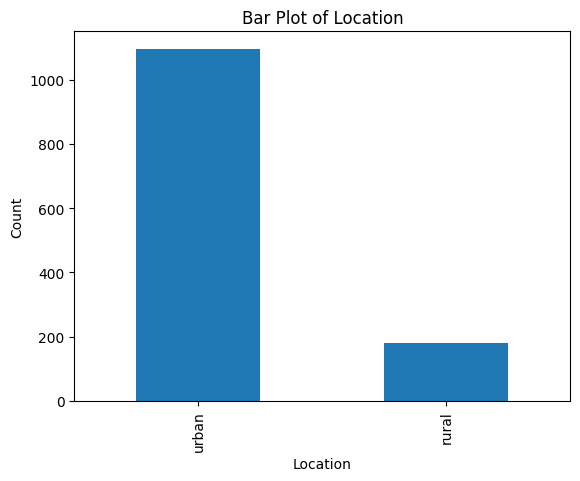

In [ ]:
# prompt: plot location

import matplotlib.pyplot as plt
df['location'].value_counts().plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Bar Plot of Location')
plt.show()


cs_ttl_male-male and cs_ttl_female-femal population


In [ ]:
df['gender'] = np.where(df['cs_ttl_male'] > 50, 0, 1)
df['gender'] = df['gender'].replace({'Male':0,'Female':1})

In [ ]:
mean_gender = df['gender'].mode()

df['gender'] = df['gender'].fillna(mean_gender)
df['gender'].isnull().any()

False

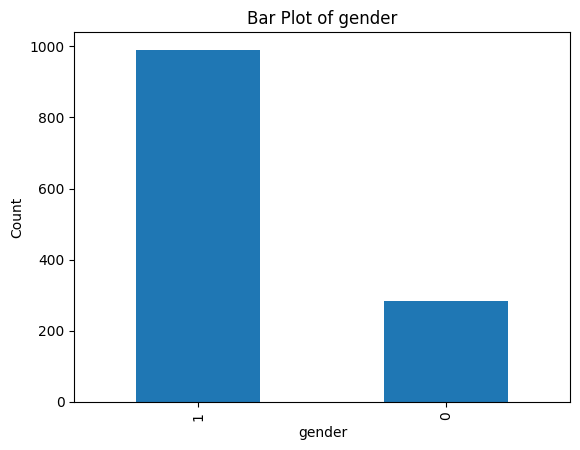

In [ ]:
import matplotlib.pyplot as plt
df['gender'].value_counts().plot(kind='bar')
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Bar Plot of gender')
plt.show()

handset

In [ ]:
df['handset'].unique()

array([1, 0, 2, 3, 5, 4, 6])

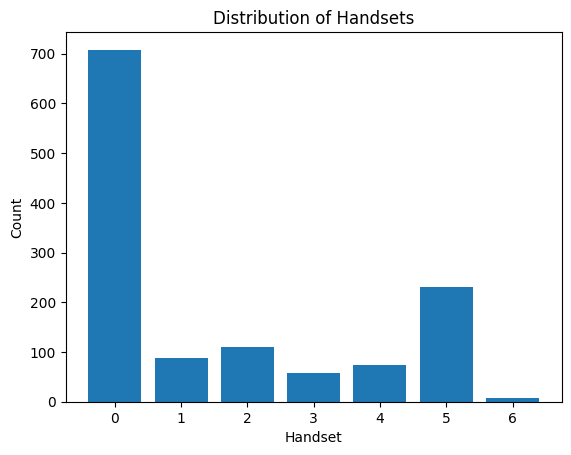

In [ ]:
# prompt: plot for handset

import matplotlib.pyplot as plt

handsets = df['handset'].value_counts()

labels = handsets.index.to_list()
values = handsets.to_numpy()

plt.bar(labels, values)
plt.xlabel("Handset")
plt.ylabel("Count")
plt.title("Distribution of Handsets")
plt.show()


calls_total-Current number of calls.
calls_in_pk-Calls Incoming Peak
calls_in_offpk-Calls Incoming Off-Peak
voice_tot_bill_mou_curr-Current minutes of voice billed



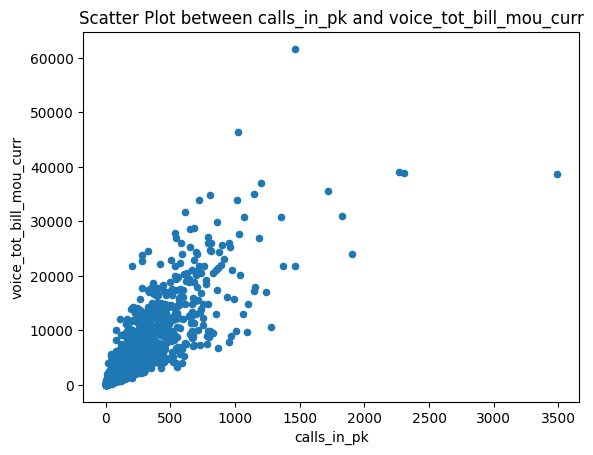

In [ ]:
# prompt: scatter plot for calls_in_pk and voice_tot_bill_mou_curr

import matplotlib.pyplot as plt
df.plot.scatter(x='calls_in_pk', y='voice_tot_bill_mou_curr')
plt.xlabel('calls_in_pk')
plt.ylabel('voice_tot_bill_mou_curr')
plt.title('Scatter Plot between calls_in_pk and voice_tot_bill_mou_curr')
plt.show()


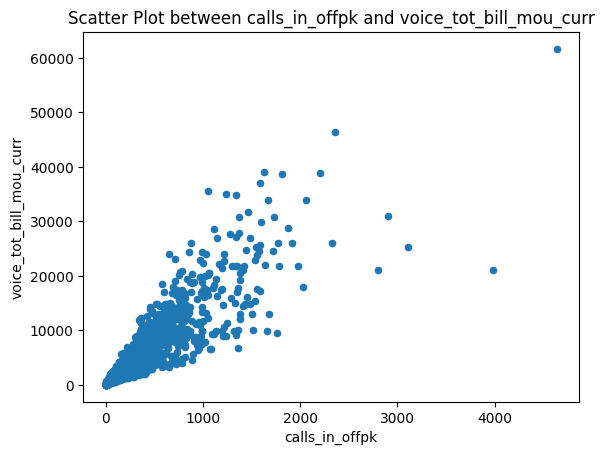

In [ ]:
import matplotlib.pyplot as plt
df.plot.scatter(x='calls_in_offpk', y='voice_tot_bill_mou_curr')
plt.xlabel('calls_in_offpk')
plt.ylabel('voice_tot_bill_mou_curr')
plt.title('Scatter Plot between calls_in_offpk and voice_tot_bill_mou_curr')
plt.show()

In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=91dc31a2acfc9f5b0ccbb118119cb6288cbdbffc91844556d80792cf336cdca6
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:
from factor_analyzer import FactorAnalyzer

In [ ]:
df['location'] = df['location'].replace({'urban':0,'rural':1})

In [ ]:
fa = FactorAnalyzer()
fa.fit(df)

FactorAnalyzer(rotation_kwargs={})

In [ ]:
factor_loadings = fa.loadings_
print("Factor Loadings:\n", factor_loadings)

Factor Loadings:
 [[-1.14879805e-01 -2.55072419e-02 -1.40562771e-02]
 [ 2.15769656e-02  2.27918804e-02  3.06845466e-01]
 [-6.21961478e-02  2.85443891e-02 -3.17814741e-02]
 [ 8.58309808e-01 -2.60792094e-02  5.50538090e-03]
 [-1.13640789e-02 -5.14701109e-03  1.88050661e-01]
 [-1.77920351e-02 -1.07562815e-02 -1.50476410e-01]
 [ 4.29888433e-02 -1.01185364e-02  7.82928856e-03]
 [ 7.06239087e-03 -8.77769761e-02 -1.48318971e-01]
 [ 1.06490302e-02  1.89591459e-02 -1.94853125e-01]
 [-8.22550651e-03  4.04207261e-02  2.56216612e-02]
 [ 7.71461662e-01 -1.25344564e-02  6.18933648e-03]
 [ 4.11893149e-01 -2.32090066e-02 -4.87028228e-02]
 [-2.22176045e-02  1.87504773e-01 -1.62812096e-02]
 [-3.00217765e-02 -1.13244479e-01 -4.69171423e-02]
 [ 3.81893701e-02 -3.65721453e-02 -8.40267454e-02]
 [ 7.50450925e-02  7.56207615e-01 -9.90101830e-03]
 [ 1.00198376e-02  4.53734561e-01 -1.58138666e-02]
 [-1.88688381e-02 -6.00918914e-01  4.15653055e-02]
 [ 2.25515009e-03  2.63069075e-01 -4.76726646e-02]
 [ 3.80141187

In [ ]:
ev, v = fa.get_eigenvalues()
print("Eigenvalues:\n", ev)

Eigenvalues:
 [ 1.15910496e+01  4.72798278e+00  4.14122617e+00  3.65747013e+00
  3.39463603e+00  3.19192586e+00  3.14590899e+00  3.11112272e+00
  2.99684356e+00  2.61569203e+00  2.36682733e+00  2.29506473e+00
  2.14497390e+00  2.10803611e+00  1.89570243e+00  1.82559530e+00
  1.79172735e+00  1.72468880e+00  1.66870323e+00  1.61140225e+00
  1.60759140e+00  1.48569532e+00  1.44950320e+00  1.42416149e+00
  1.32206500e+00  1.26997276e+00  1.26802580e+00  1.23203754e+00
  1.18679948e+00  1.18099213e+00  1.16848190e+00  1.14816206e+00
  1.13279394e+00  1.10622854e+00  1.07238435e+00  1.06724858e+00
  1.04587269e+00  1.02668790e+00  1.00505536e+00  9.63966451e-01
  9.51444306e-01  9.37624247e-01  9.35237182e-01  9.18926331e-01
  9.03952804e-01  8.71189737e-01  8.67664392e-01  8.56210100e-01
  8.35742436e-01  8.31986739e-01  7.98828960e-01  7.85728273e-01
  7.74011853e-01  7.53261511e-01  7.44627169e-01  7.34280793e-01
  7.20206405e-01  6.78145208e-01  6.64361673e-01  6.38150484e-01
  6.2464748

In [ ]:
factor_variance = fa.get_factor_variance()
print("Factor Variance:\n", factor_variance)

Factor Variance:
 (array([11.24706756,  4.21149019,  3.53680095]), array([0.09780059, 0.03662165, 0.03075479]), array([0.09780059, 0.13442224, 0.16517703]))


In [ ]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

# Assuming 'df' is your DataFrame
# Assuming 'selected_columns' is a list of numerical columns for factor analysis
selected_columns = df.columns # Replace with your actual variable names

# Fit the FactorAnalyzer
fa = FactorAnalyzer()
fa.fit(df[selected_columns])

# Get factor loadings
factor_loadings = pd.DataFrame(fa.loadings_, index=selected_columns, columns=[f'Factor_{i+1}' for i in range(fa.n_factors)])

# Display factor loadings
print("Factor Loadings:")
print(factor_loadings)

# Create a dictionary to store column names for each factor
factor_columns_dict = {}

# Loop through each factor and sort column names based on factor loading values
for factor in factor_loadings.columns:
    sorted_columns = factor_loadings[factor].abs().sort_values(ascending=False).index.tolist()
    factor_columns_dict[factor] = sorted_columns

# Display sorted column names for each factor
print("\nSorted Column Names for Each Factor:")
for factor, columns in factor_columns_dict.items():
    print(f"{factor}: {columns}")


Factor Loadings:
                    Factor_1  Factor_2  Factor_3
Customer_ID        -0.114880 -0.025507 -0.014056
upsell_xsell        0.021577  0.022792  0.306845
churn              -0.062196  0.028544 -0.031781
lifetime_value      0.858310 -0.026079  0.005505
avg_arpu_3m        -0.011364 -0.005147  0.188051
...                      ...       ...       ...
verbatims1          0.035736  0.001266  0.057159
sentiment_category  0.003040 -0.073054 -0.177422
sentiment_score    -0.019709 -0.080922 -0.156806
location           -0.083254 -0.728031  0.018865
gender              0.011598  0.089946  0.026839

[115 rows x 3 columns]

Sorted Column Names for Each Factor:
Factor_1: ['calls_in_offpk', 'calls_total', 'mb_data_usg_m02', 'bill_data_usg_m03', 'mb_data_usg_m03', 'calls_out_pk', 'mb_data_usg_m01', 'lifetime_value', 'seconds_of_data_norm', 'voice_tot_bill_mou_curr', 'calls_out_offpk', 'rfm_score', 'bill_data_usg_m06', 'calls_in_pk', 'seconds_of_data_log', 'tot_mb_data_curr', 'Est_HH_Income'

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Get the columns with the highest correlation with the target variable
target_variable = "rfm_score"
highest_correlations = corr_matrix[target_variable].abs().sort_values(ascending=False)[1:]

# Print the columns with the highest correlation
print(highest_correlations)

seconds_of_data_norm    0.727368
lifetime_value          0.690630
calls_in_offpk          0.688696
calls_total             0.684058
mb_data_usg_m02         0.673307
                          ...   
sentiment_category      0.001691
lifestage               0.001584
data_prem_chrgs_curr    0.001395
avg_data_chrgs_3m       0.000914
verbatims1              0.000616
Name: rfm_score, Length: 114, dtype: float64


<ipython-input-63-65ca45fdf526>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Get the columns with the highest correlation with the target variable
target_variable = "lifetime_value"
highest_correlations = corr_matrix[target_variable].abs().sort_values(ascending=False)[1:]

# Filter columns with correlations greater than 0.5
high_corr_columns = highest_correlations[highest_correlations > 0.5]

# Print the columns with the highest correlation
if not high_corr_columns.empty:
    print("Columns with correlations greater than 0.5:")
    print(high_corr_columns)
else:
    print("No columns with correlations greater than 0.5.")


<ipython-input-56-35d0c6b84be9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Columns with correlations greater than 0.5:
calls_out_offpk            0.888692
calls_total                0.769658
seconds_of_data_norm       0.761354
calls_out_pk               0.750139
calls_in_offpk             0.749936
bill_data_usg_m06          0.744327
mb_data_usg_m02            0.717391
bill_data_usg_m03          0.693760
rfm_score                  0.690630
voice_tot_bill_mou_curr    0.686906
mb_data_usg_m03            0.684375
mb_data_usg_m01            0.681591
calls_in_pk                0.613433
Name: lifetime_value, dtype: float64


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame with 'rfm_score' column
# Create a new column 'segment' based on RFM scores
df['segment'] = pd.cut(df['rfm_score'], bins=[0, 111, 222, 333, 444, 555], labels=['Churn Risk', 'Low-Value', 'Medium-Value', 'High-Value', 'Loyal'])

# Display the DataFrame with segments
print(df[['Customer_ID', 'rfm_score', 'segment']])

      Customer_ID  rfm_score       segment
0             471        223  Medium-Value
1            1057        333  Medium-Value
2            1177        312  Medium-Value
3            1181        112     Low-Value
4            1185        332  Medium-Value
...           ...        ...           ...
1270        75360        312  Medium-Value
1271        75364        112     Low-Value
1272        75365        313  Medium-Value
1273        75371        222     Low-Value
1274        75372        222     Low-Value

[1275 rows x 3 columns]


In [ ]:
df["rfm_score"].unique()

array([223, 333, 312, 112, 332, 213, 323, 322, 233, 123, 222, 232, 313,
       122, 121, 111, 212, 231, 133, 131, 321, 331, 113, 221, 311, 132,
       211])

In [ ]:
# prompt: pie plot for cs_ttl_mdage

import matplotlib.pyplot as plt
df['cs_ttl_mdage'].min()

df['cs_ttl_mdage'].max()

63.9

In [ ]:
a=df['cs_hispanic'].mean()

In [ ]:
b=df["cs_caucasian"].mean()

In [ ]:
c=df["cs_afr_amer"].mean()

In [ ]:
d=df["cs_other"].mean()

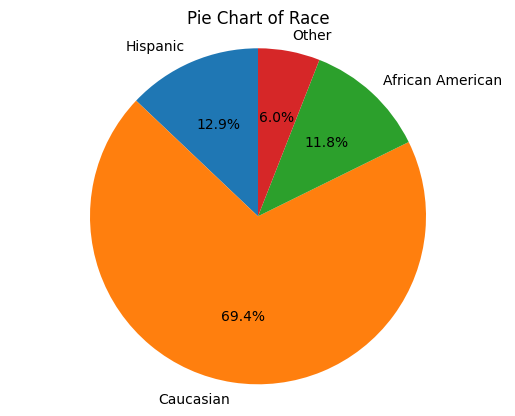

In [ ]:
# prompt: do pie chart in a,b,c,d

import matplotlib.pyplot as plt
labels = ['Hispanic', 'Caucasian', 'African American', 'Other']
values = [a, b, c, d]

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct="%1.1f%%", startangle=90)
ax.axis('equal')
plt.title('Pie Chart of Race')
plt.show()


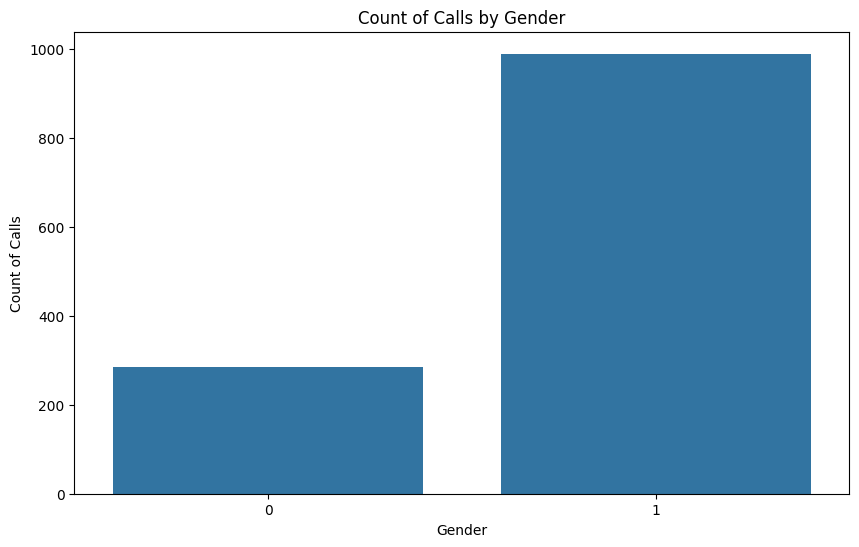

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df)
plt.title('Count of Calls by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Calls')
plt.show()

In [ ]:
X = df[['rfm_score', 'seconds_of_data_norm', 'calls_total', 'calls_in_offpk', 'voice_tot_bill_mou_curr', 'calls_out_pk']]
y = df['lifetime_value']

In [ ]:
from scipy import stats

# Calculate Z-scores for each column
z_scores = stats.zscore(X)

# Find indices of rows where Z-score is greater than 3 in absolute value
outlier_indices = (np.abs(z_scores) > 3).any(axis=1)

# Remove rows with outliers
X_filtered = X[~outlier_indices]
y_filtered = y[~outlier_indices]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the independent variables (X)
X_scaled = scaler_X.fit_transform(X)

# Reshape y to a 2D array if it's a single feature
if len(y.shape) == 1:
    y = y.values.reshape(-1, 1)

# Fit and transform the target variable (y)
y_scaled = scaler_y.fit_transform(y)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the Gradient Boosting model
gbm_model = GradientBoostingRegressor(random_state=42)

# Fit the model to the training data
gbm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm = gbm_model.predict(X_test)

# Calculate accuracy metrics
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

print("Gradient Boosting Machines - Mean Squared Error:", mse_gbm)
print("Gradient Boosting Machines - R-squared:", r2_gbm)

ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values